In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import pandas as pd
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from time import time
from pprint import pprint


def save_image(im, i):
    im = 255 - im
    a = im.astype(np.uint8)
    output_path = '.\\HandWritten'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    Image.fromarray(a).save(output_path + ('\\%d.png' % i))


def save_result(model):
    data_test_hat = model.predict(data_test)
    with open('Prediction.csv', 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['ImageId', 'Label'])
        for i, d in enumerate(data_test_hat):
            writer.writerow([i, d])
        # writer.writerows(zip(np.arange(1, len(data_test_hat) + 1), data_test_hat))

In [2]:
classifier_type = 'SVM'

print '载入训练数据...'
t = time()
data = pd.read_csv('.\\16.MNIST.train.csv', header=0, dtype=np.int)
print '载入完成，耗时%f秒' % (time() - t)
y = data['label'].values

载入训练数据...
载入完成，耗时6.906000秒


In [3]:
x = data.values[:, 1:]
print '图片个数：%d，图片像素数目：%d' % x.shape
images = x.reshape(-1, 28, 28)
y = y.ravel()

图片个数：42000，图片像素数目：784


In [4]:
print '载入测试数据...'
t = time()
data_test = pd.read_csv('.\\16.MNIST.test.csv', header=0, dtype=np.int)
data_test = data_test.values
images_test_result = data_test.reshape(-1, 28, 28)
print '载入完成，耗时%f秒' % (time() - t)

载入测试数据...
载入完成，耗时4.861000秒


In [7]:
np.random.seed(0)
x, x_test, y, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
images = x.reshape(-1, 28, 28)
images_test = x_test.reshape(-1, 28, 28)
print x.shape, x_test.shape

(21504L, 784L) (5376L, 784L)


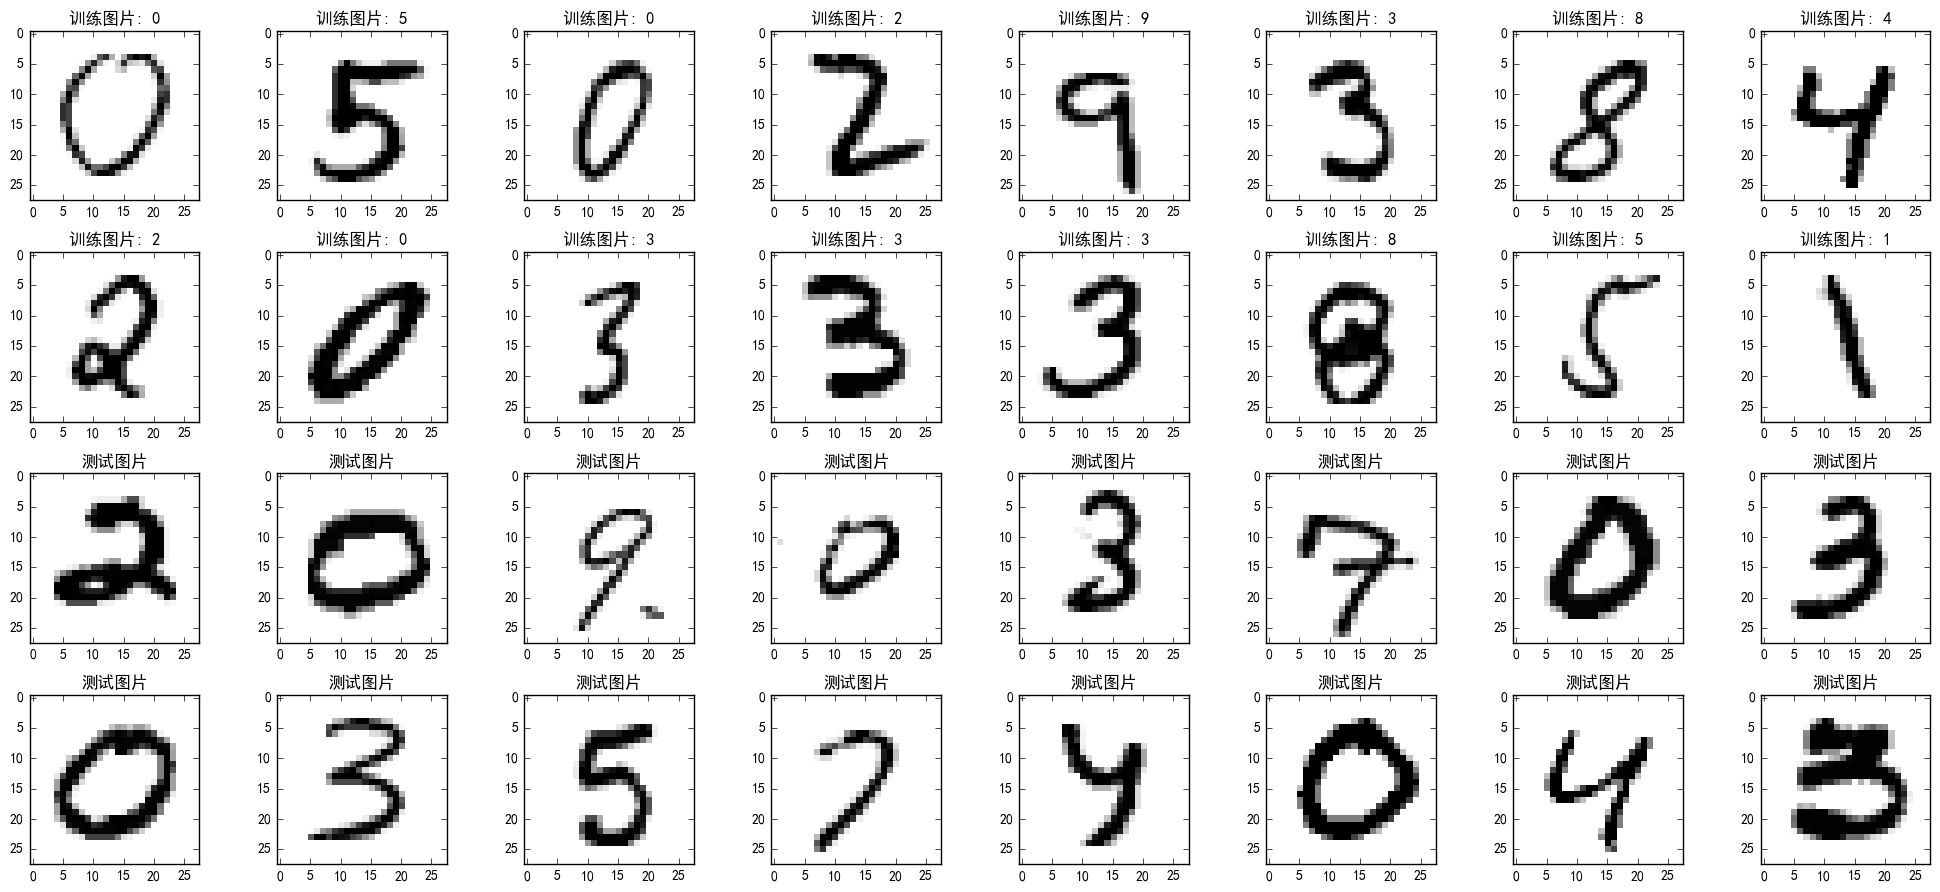

In [10]:
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20, 9), facecolor='w')
for index, image in enumerate(images[:16]):
    plt.subplot(4, 8, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'训练图片: %i' % y[index])
for index, image in enumerate(images_test_result[:16]):
    plt.subplot(4, 8, index + 17)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    save_image(image.copy(), index)
    plt.title(u'测试图片')
plt.tight_layout()
plt.show()

In [19]:
# params = {'C':np.logspace(1, 4, 3, base=10), 'gamma':np.logspace(-5, -2, 3, base=10)}
# clf = svm.SVC(kernel='rbf')
# model = GridSearchCV(clf, param_grid=params, cv=3)
model = svm.SVC(C=10, kernel='rbf', gamma=1e-5)
print 'SVM开始训练...'
t = time()
model.fit(x, y)
t = time() - t
print 'SVM训练结束，耗时%d分钟%.3f秒' % (int(t/60), t - 60*int(t/60))
# print '最优分类器：', model.best_estimator_
# print '最优参数：\t', model.best_params_
print 'model.cv_results_ ='
pprint(model.cv_results_)

SVM开始训练...
SVM训练结束，耗时24分钟10.291秒
model.cv_results_ =


AttributeError: 'SVC' object has no attribute 'cv_results_'

In [20]:
t = time()
y_hat = model.predict(x)
t = time() - t
print 'SVM训练集准确率：%.3f%%，耗时%d分钟%.3f秒' % (accuracy_score(y, y_hat)*100, int(t/60), t - 60*int(t/60))
t = time()
y_test_hat = model.predict(x_test)
t = time() - t
print 'SVM验证集准确率：%.3f%%，耗时%d分钟%.3f秒' % (accuracy_score(y_test, y_test_hat)*100, int(t/60), t - 60*int(t/60))
data_test_hat = model.predict(data_test)
t = time() - t
print '耗时%d分钟%.3f秒' % ( int(t/60), t - 60*int(t/60))
save_result(model)

SVM训练集准确率：100.000%，耗时11分钟44.289秒
SVM验证集准确率：18.452%，耗时2分钟54.063秒
耗时24795739分钟46.139秒


In [21]:
rfc = RandomForestClassifier(100, criterion='gini', min_samples_split=2,
                             min_impurity_split=1e-10, bootstrap=True, oob_score=True)
print '随机森林开始训练...'
t = time()
rfc.fit(x, y)
t = time() - t
print '随机森林训练结束，耗时%d分钟%.3f秒' % (int(t/60), t - 60*int(t/60))
print 'OOB准确率：%.3f%%' % (rfc.oob_score_*100)
t = time()
y_hat = rfc.predict(x)
t = time() - t
print '随机森林训练集准确率：%.3f%%，预测耗时：%d秒' % (accuracy_score(y, y_hat)*100, t)
t = time()
y_test_hat = rfc.predict(x_test)
t = time() - t
print '随机森林测试集准确率：%.3f%%，预测耗时：%d秒' % (accuracy_score(y_test, y_test_hat)*100, t)
save_result(rfc)

随机森林开始训练...
随机森林训练结束，耗时0分钟29.464秒
OOB准确率：95.159%
随机森林训练集准确率：100.000%，预测耗时：1秒
随机森林测试集准确率：95.666%，预测耗时：0秒


[4 5 8 2 8 9 8 6 2 0 2 6 1 8 3 3 3 8 3 9 3 8 5 6 3 2 6 7 4 8 8 2 2 3 9 4 3
 2 7 3 5 9 5 5 5 4 6 0 7 3 6 2 8 5 1 6 5 5 2 3 4 0 6 2 0 4 7 3 1 4 7 8 8 5
 6 8 8 9 7 7 8 4 9 4 8 6 7 3 3 9 0 2 5 4 9 6 9 2 7 3 9 1 0 5 7 7 8 8 6 2 5
 2 4 2 6 1 6 5 5 3 8 0 4 2 3 8 0 3 6 7 8 2 6 3 3 4 4 2 9 9 9 6 9 9 0 2 1 0
 9 9 7 8 2 9 9 3 2 0 3 6 9 2 5 3 6 0 9 1 8 1 2 7 3 9 6 1 2 9 0 1 8 3 9 9 9
 2 1 0 7 0 6 7 7 4 4 4 0 0 0 2 8 0 3 1 8 7 3 6 5 1 3 3 2 8 9 3 4 9 9 5 9 2
 8 0 0 4 2 0 2 6 8 3 0]
[9 9 3 3 9 7 9 4 9 8 3 5 2 2 5 8 8 3 8 4 8 1 9 3 2 8 5 9 9 4 9 1 1 2 7 8 5
 3 5 5 3 7 3 8 3 9 4 3 9 9 1 3 5 6 2 5 8 9 3 9 9 6 8 7 8 9 2 9 2 7 3 1 7 6
 4 3 5 5 3 3 0 2 8 8 5 5 2 5 5 4 4 3 6 9 8 5 8 1 2 5 3 9 5 8 9 2 4 9 4 7 8
 3 5 5 0 8 0 0 6 8 2 5 9 3 2 3 6 8 4 3 7 9 4 5 5 5 2 4 7 3 4 5 5 3 5 9 6 5
 4 4 9 2 7 4 4 5 8 9 8 8 3 3 3 5 5 3 4 3 0 4 3 3 9 4 0 3 7 8 2 8 2 8 8 4 4
 5 7 9 2 2 2 2 9 2 9 9 6 6 5 3 5 6 5 2 6 1 8 0 3 8 7 9 7 4 8 9 9 4 3 6 4 1
 4 8 6 9 3 2 7 5 2 8 9]


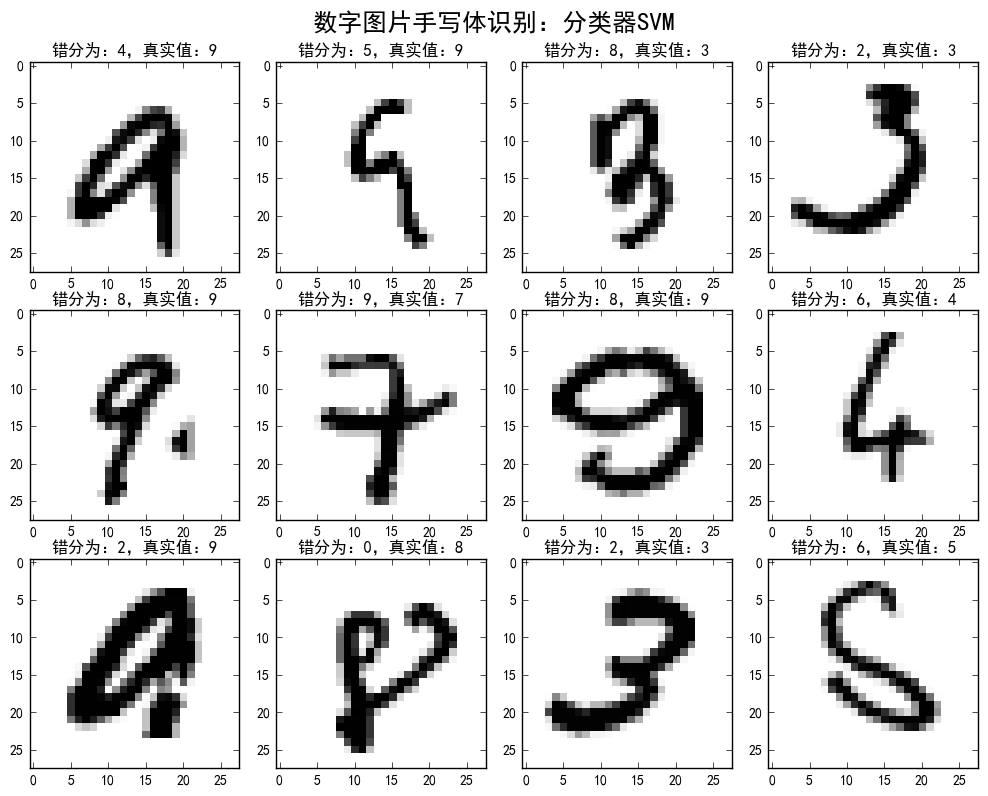

In [22]:
err = (y_test != y_test_hat)
err_images = images_test[err]
err_y_hat = y_test_hat[err]
err_y = y_test[err]
print err_y_hat
print err_y
plt.figure(figsize=(10, 8), facecolor='w')
for index, image in enumerate(err_images):
    if index >= 12:
        break
    plt.subplot(3, 4, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'错分为：%i，真实值：%i' % (err_y_hat[index], err_y[index]))
plt.suptitle(u'数字图片手写体识别：分类器%s' % classifier_type, fontsize=18)
plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.show()
